# 1/ Phase de pré-traitement.

In [300]:
import pandas as pd
import numpy as np

In [301]:
df=pd.read_csv("Data.csv", sep=";")

## Affichons l'en-tête de l'ensemble de données, puis quelques informations générales sur les colonnes de données et les valeurs.


In [302]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander,Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen,Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen,Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson,Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson,Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,NaN,No,3,"Gustafsson,Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett,Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid"",Miss. Maria (""""""""Mary"""""""")""""",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell"",Mr. John Hall (""""""""Henry"""""""")""""",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch,Mrs. Charles Alexander (Alice Adelaide S...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [304]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


## Trouvons les informations manquantes et remplaçons-les par les valeurs appropriées.


### Les valeurs manquantes

In [305]:
df.isnull().sum()

PassengerId      1
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Remplaçons les données manquantes

#### Dans "Age", nous allons remplacer les données manquantes par la moyenne. Nous allons prendre 30 qui équivaut à la moyenne arrondie.

In [306]:
df["Age"].fillna(30, inplace=True)

#### Dans "Cabin", il y a beaucoup trop de données manquantes. Nous préférons supprimer la colonne.

In [307]:
df=df.drop("Cabin", axis=1)

#### Dans "Embarked" il n'y a que deux valeurs manquantes. Nous allons les supprimer.

In [308]:
df=df.dropna(how="any")

#### Vérifions qu'il n'y a plus de données manquantes.

In [309]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Transformons les données de "Survived", "Sex" et "Embarked"  en données numériques. 0 pour "No" et 1 pour "Yes"

In [310]:
df["Survived"]=df["Survived"].replace(["Yes", "No"] , [1 , 0])

In [311]:
df["Sex"]=df["Sex"].replace(["male", "female"] , [1 , 0])

In [312]:
df["Embarked"]=df["Embarked"].replace(["C", "S", "Q"] , [1 , 2, 3])

In [313]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander,Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2
1,76,0,3,"Moen,Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2
2,641,0,3,"Jensen,Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2
3,568,0,3,"Palsson,Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2
4,672,0,1,"Davidson,Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2
6,576,0,3,"Patchett,Mr. George",1,19.0,0,0,358585,14.5000,2
7,382,1,3,"Nakid"",Miss. Maria (""""""""Mary"""""""")""""",0,1.0,0,2,2653,15.7417,1
8,228,0,3,"Lovell"",Mr. John Hall (""""""""Henry"""""""")""""",1,20.5,0,0,A/5 21173,7.2500,2
9,433,1,2,"Louch,Mrs. Charles Alexander (Alice Adelaide S...",0,42.0,1,0,SC/AH 3085,26.0000,2
10,135,0,2,"Sobey,Mr. Samuel James Hayden",1,25.0,0,0,C.A. 29178,13.0000,2


## Oui les données sont maintenant prêtes à être visualisées.

##                                                                                                                   

# 2/ Phase de visualisation

In [314]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### Etudions la distribution de la variable "Survived" avec Seaborn.

<AxesSubplot:xlabel='Survived', ylabel='count'>

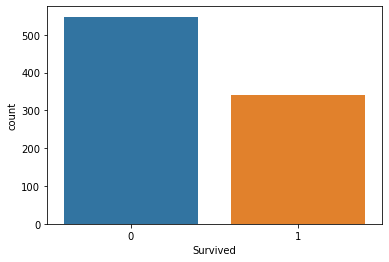

In [315]:
sns.countplot(x="Survived", data=df)

### Interprétations: il y a beaucoup plus de morts (548) que de survivants (340).



#   

#### Etudions la distribution de la variable "Age" avec Matplotlib.

<AxesSubplot:title={'center':'Histogramme des differents âges'}, xlabel='Age', ylabel='Frequency'>

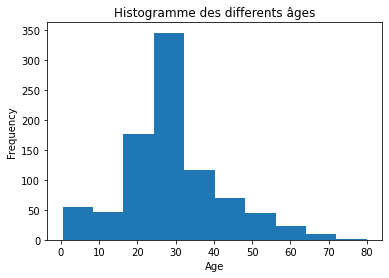

In [316]:
plt.title("Histogramme des differents âges")
plt.xlabel("Age")
df["Age"].plot.hist()

#### Interprétations:
#### -- Les âges varient entre 18 et 74 ans
#### -- Les âges les plus fréquents sont entre 24 ans et 30 ans.




#         

#### Etudions la distribution de la variable "Sex" avec Seaborn.

<AxesSubplot:xlabel='Sex', ylabel='count'>

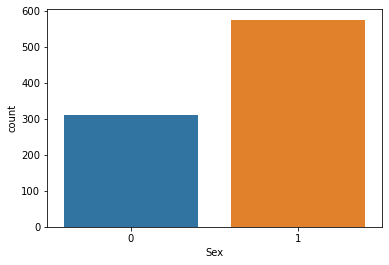

In [317]:
sns.countplot(x="Sex", data=df)

#### Interprétation: le nombre de personnes de sexe masculin (576) est largement supérieur à celui des personnes de sexe féminin (312).

#    

### Visualisons la corrélation entre l'âge et le sexe dans un graphique de notre choix (histogramme avec Seaborn) et montrons l'importance de ces deux variables sur la survie des individus.

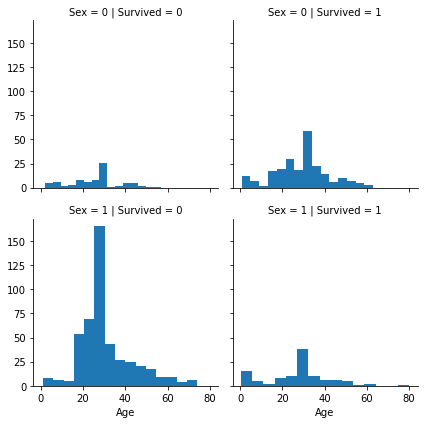

In [318]:
g=sns.FacetGrid(df, row="Sex", col="Survived")
g.map(plt.hist, "Age", bins=15)

#### D'après ces graphiques, nous remarquons:
#### -  qu'il y a plus de femmes qui ont survécu que d'hommes
#### - que les femmes qui ont eu plus de chance de survie sont celles qui ont un âge qui tourne autour de 35 ans
#### - que les hommes qui ont eu plus de chance de survie sont ceux qui ont un age qui tourne autour de 30 ans

# 



### Etudions aussi l'importance du lieu de la classe du ticket ( Pclass) et le lieu de l'embarcation (Embarked) sur la survie des individus.

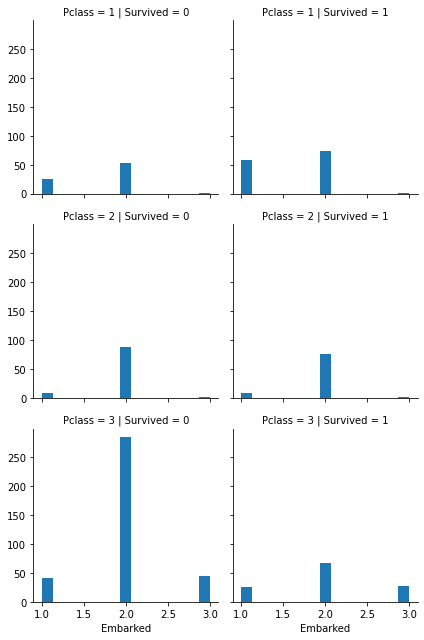

In [319]:
g=sns.FacetGrid(df, row="Pclass", col="Survived")
g.map(plt.hist, "Embarked", bins=15)

#### D'après ces graphiques, nous pouvons dire que:
##### -les passagers de la première classe ont eu plus de chance de survie que les autres
##### -les passagers ayant embarqué au niveau de C (port de Cherbourg) ont eu plus de chance de survie que les autres

# 

# 

### Essayons d'executer la fonction suivante puis analysons ce qu'elle fait exactement et ses utilités.

In [320]:
def plot_correlation_map(df):
    corr=df.corr()
    s, ax=plt.subplots(figsize=(12,10))
    cmap=sns.diverging_palette(220,10,as_cmap=True)
    s=sns.heatmap(corr,cmap=cmap, square=True,cbar_kws={'shrink':.9},ax=ax,annot=True,annot_kws={'fontsize':12})

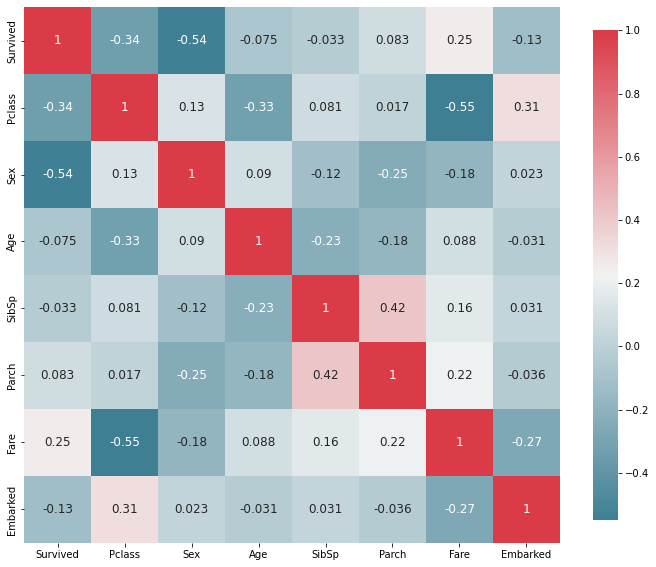

In [321]:
plot_correlation_map(df)


### Analyse: This is Heatmap. It tells us a lot about the relationship between the different variables.
### By just looking at it, we can tell that some values are more correlated than others.
#### - "SibSp"  and Parch" are 42% correlated
#### - "Pclass" and "Embarked" are 31% correlated 
#### - "Fare" and "Survived" are 25% correlated


# 

### Utilisons la fonction Groupby combinée à mean() pour voir la relation entre "Pclass" et "Survived".

In [322]:
df[["Pclass", "Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived")

,Pclass,Survived
2,3,0.242857
1,2,0.472826
0,1,0.626168


# 

### Nous allons créer une nouvelle colonne appelée "Title" qui va contenir le titre approprié de chaque individu. Ce titre sera extrait de "Name".

In [323]:
df["Title"]= df["Name"].map(lambda name:name.split(",")[1].split(".")[0].strip())

In [324]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander,Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2,Mr
1,76,0,3,"Moen,Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2,Mr
2,641,0,3,"Jensen,Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2,Mr
3,568,0,3,"Palsson,Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2,Mrs
4,672,0,1,"Davidson,Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2,Mr


# 


### Visualisons la corrélation entre le titre et d'autres critères comme le sexe et l'âge.

In [325]:
df[["Title", "Sex"]].groupby(["Title"],as_index=False).mean().sort_values(by="Sex")

,Title,Sex
8,Miss,0.000000
13,Ms,0.000000
12,Mrs,0.000000
10,Mme,0.000000
9,Mlle,0.000000
16,the Countess,0.000000
5,Lady,0.000000
3,Dr,0.857143
6,Major,1.000000
7,Master,1.000000


In [326]:
df[["Title", "Age"]].groupby(["Title"],as_index=False).mean().sort_values(by="Age")

,Title,Age
7,Master,7.116750
8,Miss,23.320442
10,Mme,24.000000
9,Mlle,24.000000
13,Ms,28.000000
11,Mr,31.812984
16,the Countess,33.000000
12,Mrs,34.879032
4,Jonkheer,38.000000
2,Don,40.000000


In [327]:
new_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
df.Title = df.Title.map(new_titles)

In [328]:
df.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,"Collander,Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,2,Mr
1,76,0,3,"Moen,Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,2,Mr
2,641,0,3,"Jensen,Mr. Hans Peder",1,20.0,0,0,350050,7.8542,2,Mr
3,568,0,3,"Palsson,Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,2,Mrs
4,672,0,1,"Davidson,Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,2,Mr
6,576,0,3,"Patchett,Mr. George",1,19.0,0,0,358585,14.5000,2,Mr
7,382,1,3,"Nakid"",Miss. Maria (""""""""Mary"""""""")""""",0,1.0,0,2,2653,15.7417,1,Miss
8,228,0,3,"Lovell"",Mr. John Hall (""""""""Henry"""""""")""""",1,20.5,0,0,A/5 21173,7.2500,2,Mr
9,433,1,2,"Louch,Mrs. Charles Alexander (Alice Adelaide S...",0,42.0,1,0,SC/AH 3085,26.0000,2,Mrs
10,135,0,2,"Sobey,Mr. Samuel James Hayden",1,25.0,0,0,C.A. 29178,13.0000,2,Mr


# 


### Visualisons à nouveau les éléments précédents avec les nouveaux titres.

In [329]:
df[["Title", "Sex"]].groupby(["Title"],as_index=False).mean().sort_values(by="Sex")

,Title,Sex
1,Miss,0.000000
3,Mrs,0.000000
5,Royalty,0.600000
4,Officer,0.944444
0,Master,1.000000
2,Mr,1.000000


In [330]:
df[["Title", "Age"]].groupby(["Title"],as_index=False).mean().sort_values(by="Age")

,Title,Age
0,Master,7.116750
1,Miss,23.327869
2,Mr,31.812984
3,Mrs,34.738095
5,Royalty,41.600000
4,Officer,45.777778


# 

### Créons une nouvelle colonne nommée "FamilySize" et qui va regrouper "Parch" et "SibSp"

In [331]:
df["FamilySize"]= df["SibSp"] + df["Parch"]
df.drop("SibSp", axis=1, inplace=True)
df.drop("Parch", axis=1, inplace=True)

In [332]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
0,343,0,2,"Collander,Mr. Erik Gustaf",1,28.0,248740,13.0000,2,Mr,0
1,76,0,3,"Moen,Mr. Sigurd Hansen",1,25.0,348123,7.6500,2,Mr,0
2,641,0,3,"Jensen,Mr. Hans Peder",1,20.0,350050,7.8542,2,Mr,0
3,568,0,3,"Palsson,Mrs. Nils (Alma Cornelia Berglund)",0,29.0,349909,21.0750,2,Mrs,4
4,672,0,1,"Davidson,Mr. Thornton",1,31.0,F.C. 12750,52.0000,2,Mr,1


# 


### Oui cette fonctionnalité est importante parce que plus la famille est grande, moins ses membres ont de chance de  sortir vivants.